# Interpolation

## Via SciPy

We can perform interpolation in Hist using SciPy.

In [1]:
# Make the necessary imports.

from scipy import interpolate
from hist import Hist, axis
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# We obtain evenly spaced numbers over the specified interval.
x = np.linspace(-27, 27, num=41, endpoint=True)

# Define a Histo object and fill it.
h = Hist.new.Reg(10, -30, 30).Double()
centers = h.axes[0].centers
weights = np.cos(-(centers ** 2) / 9.0) ** 2
h.fill(centers, weight=weights)

Hist(Regular(10, -30, 30, label='Axis 0'), storage=Double()) # Sum: 5.596329884235402

### Linear 1-D

We can obtain a linear interpolation by passion the `kind="linear"` argument in [interpolate.interp1d()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html).

In [3]:
linear_interp = interpolate.interp1d(h.axes[0].centers, h.values(), kind="linear")

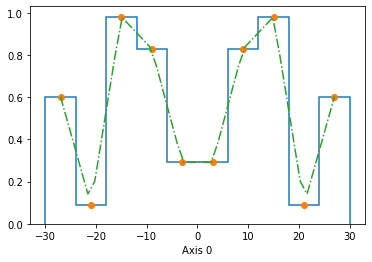

In [4]:
h.plot()
plt.plot(h.axes[0].centers, h.values(), "o", x, linear_interp(x), "-.")
plt.show()

### Cubic 1-D

We can obtain a cubic interpolation by passion the `kind="cubic"` argument in [interpolate.interp1d()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html).

In [5]:
cubic_interp = interpolate.interp1d(h.axes[0].centers, h.values(), kind="cubic")

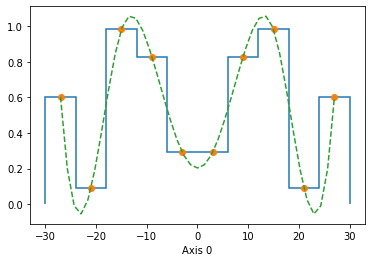

In [6]:
h.plot()
plt.plot(h.axes[0].centers, h.values(), "o", x, cubic_interp(x), "--")
plt.show()

We can also plot them both together to compare the interpolations.

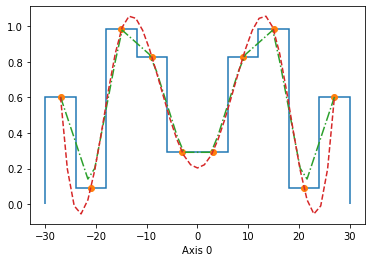

In [7]:
h.plot()
plt.plot(
    h.axes[0].centers,
    h.values(),
    "o",
    x,
    linear_interp(x),
    "-.",
    x,
    cubic_interp(x),
    "--",
)
plt.show()